# Importing liberares

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import missingno as msno
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import joblib
import datasist as ds

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set(rc={"figure.figsize": [8,10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('car_prediction_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
ds.structdata.describe(df)

First five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0




Random five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
287,amaze,2015,5.75,7.5,44000,Petrol,Dealer,Automatic,0
264,amaze,2015,4.00,7.0,40026,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
208,i20,2017,7.90,8.1,3435,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.0,63000,Diesel,Dealer,Manual,0




Last five data points


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0




Shape of  data set: (301, 9)


Size of  data set: 2709


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64




Numerical Features in Data set
['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


Categorical Features in Data set


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']



Statistical Description of Columns


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000




Description of Categorical Features


,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261




Unique class Count of Categorical features


,Feature,Unique Count
0,Car_Name,98
1,Fuel_Type,3
2,Seller_Type,2
3,Transmission,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Car_Name,0,0.0
1,Year,0,0.0
2,Selling_Price,0,0.0
3,Present_Price,0,0.0
4,Kms_Driven,0,0.0
5,Fuel_Type,0,0.0
6,Seller_Type,0,0.0
7,Transmission,0,0.0
8,Owner,0,0.0


In [5]:
df.drop(labels = ['Car_Name'],axis=1,inplace=True)

In [6]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [7]:
for cat in df.columns.drop(['Selling_Price','Present_Price','Kms_Driven']):
    print(cat)
    print('---------')
    print(df[cat].value_counts())
    print(f'--------------- \n')

Year
---------
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64
--------------- 

Fuel_Type
---------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
--------------- 

Seller_Type
---------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
--------------- 

Transmission
---------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
--------------- 

Owner
---------
0    290
1     10
3      1
Name: Owner, dtype: int64
--------------- 



<AxesSubplot:>

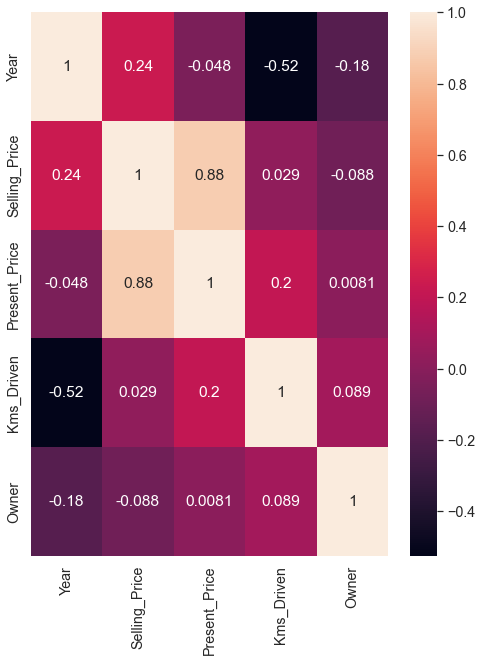

In [8]:
sns.heatmap(df.corr() , annot=True)

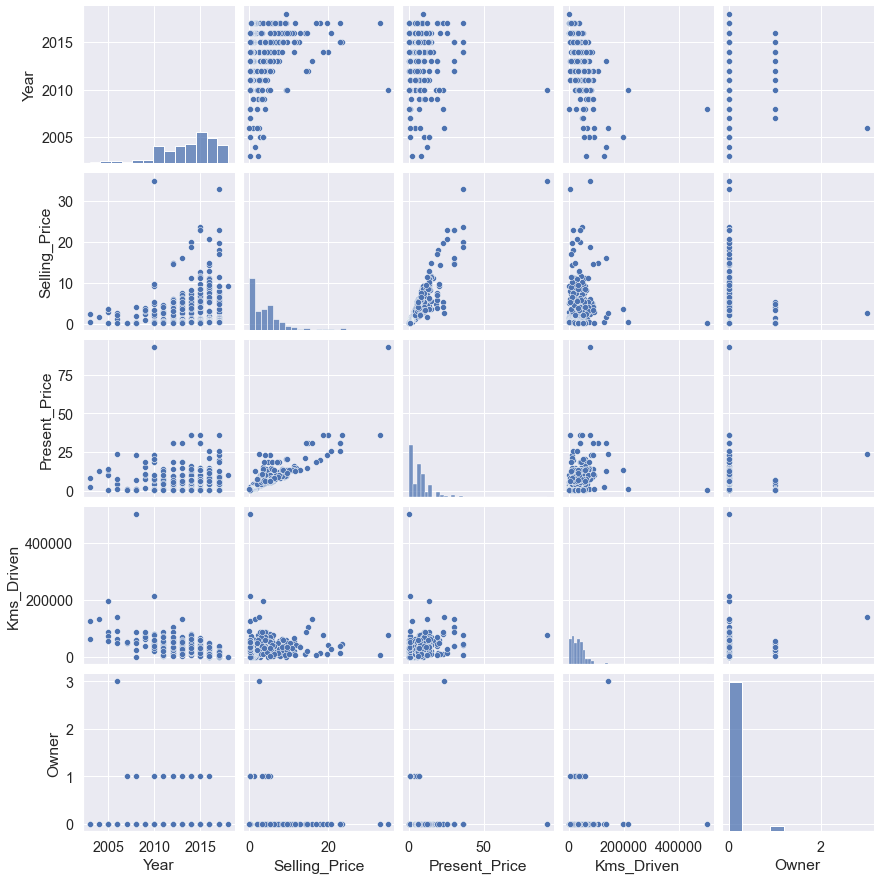

In [9]:
sns.pairplot(df)

In [10]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [11]:
v = ['Fuel_Type','Seller_Type','Transmission']

for i in v:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
**************************************************
Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
**************************************************
Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64
**************************************************


In [12]:
size_dict = {'Petrol':1, 
        'Diesel':2, 
        'CNG':3, 
        }

# apply using map
df['Fuel_Type'] = df['Fuel_Type'].map(size_dict)

In [13]:
df = pd.get_dummies(df, columns=['Seller_Type','Transmission'], drop_first=True)

In [14]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.590,27000,1,0,0,1
1,2013,4.75,9.540,43000,2,0,0,1
2,2017,7.25,9.850,6900,1,0,0,1
3,2011,2.85,4.150,5200,1,0,0,1
4,2014,4.60,6.870,42450,2,0,0,1
5,2018,9.25,9.830,2071,2,0,0,1
6,2015,6.75,8.120,18796,1,0,0,1
7,2015,6.50,8.610,33429,2,0,0,1
8,2016,8.75,8.890,20273,2,0,0,1
9,2015,7.45,8.920,42367,2,0,0,1


In [15]:
x = df.drop(['Selling_Price','Year','Present_Price'],axis=1)
y = df['Selling_Price']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    
}
#'LGR' : LogisticRegression()

for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 2.13054860361727
Test MAE: 2.086881408666975
Train RMSE: 3.579468773447468
Test RMSE: 3.0722385976822
Train R2: 0.5214561253721541
Test R2: 0.5649225214548012


Model: SVM
--------------------
Train MAE: 3.2525244612231696
Test MAE: 2.8986245788901828
Train RMSE: 5.373500258054342
Test RMSE: 4.580777054941509
Train R2: -0.07844786152706851
Test R2: 0.032758255978616035


Model: KNN
--------------------
Train MAE: 3.0162166666666668
Test MAE: 3.821081967213115
Train RMSE: 4.469623723909356
Test RMSE: 4.911458138799548
Train R2: 0.2538493313729525
Test R2: -0.11193042704972678


Model: DT
--------------------
Train MAE: 0.14843055555555557
Test MAE: 1.6357650273224045
Train RMSE: 0.5603912633647633
Test RMSE: 2.4182387245976975
Train R2: 0.9882708290170323
Test R2: 0.7304402382750527


Model: RF
--------------------
Train MAE: 0.8194326569113758
Test MAE: 1.4574557916991926
Train RMSE: 1.5142181762836162
Test RMSE: 2.136004497304835
Train R2: 0.9